# Explore here

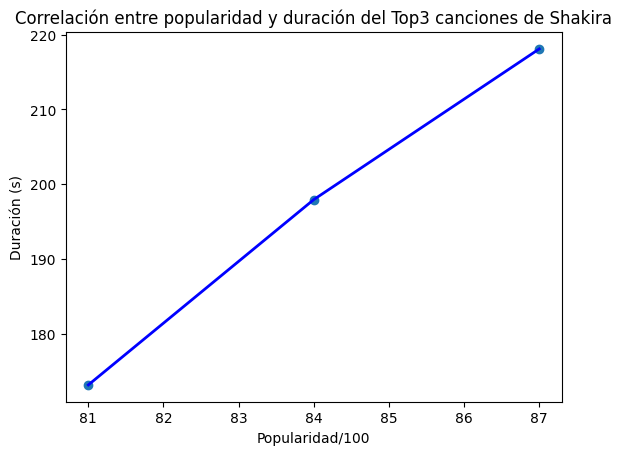

Según la el gráfico de correlación del top3 parece existir una correlación entre la duración (en segundos) y la popularidad (en puntuación sobre 100)


In [21]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import matplotlib.pyplot as plt 

# load the .env file variables
load_dotenv()

#Pongo esto así porque se me borra 

#CLIENT_ID="cf47b75cbc154faabb0f5b6829216883"
#CLIENT_SECRET="fc9b3559bb9247d7a9e20cbcdb1b4037"

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")


import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
spotipy.Spotify()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

#sp= llave para peticiones a Spoti

sh_url = 'spotify:artist:0EmeFodog0BfCgMzAIvKQp'
top_tracks = sp.artist_top_tracks(sh_url)
artist_name = "Shakira"

#El data fuera del for y el data.append dentro para hacer el df y poder filtrar
data=[]

for idx, track in enumerate(top_tracks['tracks'][:10]):
    nombre= track["name"]
    popularidad= track["popularity"]
    duracion_ms = track["duration_ms"]
    duracion_s = duracion_ms /1000

    data.append({"Nombre": nombre, "Popularidad/100": popularidad, "Duración(s)": duracion_s})

    #print(idx+1, nombre, popularidad, duracion_s)

ds= pd.DataFrame(data)  
#No incluyo en indice porque ya lo tiene y no hace falta ordenarlo por popularidad porque ya lo esta

ds_top3=ds.head(n=3)

x= ds_top3["Popularidad/100"]
y= ds_top3["Duración(s)"]

plt.scatter(x,y)
plt.plot(x, y, color='blue', linestyle='-', linewidth=2)

plt.legend
plt.xlabel("Popularidad/100")
plt.ylabel("Duración (s)")
plt.title("Correlación entre popularidad y duración del Top3 canciones de Shakira")
plt.show()

print("Según la el gráfico de correlación del top3 parece existir una correlación entre la duración (en segundos) y la popularidad (en puntuación sobre 100)")


